## Radioactive decay main program

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from src.utils.plot_utils import setup_mpl

setup_mpl(as_default=0)

{'mm_to_inch': 3.937007874015748,
 'one_col_mm': 89,
 'two_col_mm': 183,
 'height_mm': 89,
 'alpha': 0.6,
 'to_rgba': <function matplotlib.colors.to_rgba(c, alpha=None)>,
 'save_pdf': <function src.utils.plot_utils.setup_mpl.<locals>.save_pdf(path, fig)>,
 'save_svg': <function src.utils.plot_utils.setup_mpl.<locals>.save_svg(path, fig)>,
 'save_png': <function src.utils.plot_utils.setup_mpl.<locals>.save_png(path, fig)>}

In [5]:
## euler method
def calculate(n_uranium,tau,dt,n,t):
    for i in range(n-1):
        n_uranium[i+1] = n_uranium[i] - (n_uranium[i]/tau)*dt
        t[i+1] = t[i] + dt
    return n_uranium,t

def main(n = 100, dt = 0.05, tau = 1):
    n_uranium = np.zeros(n)
    t = np.zeros(n)
    n_uranium[0] = n # initial number of uranium
    n_uranium,t = calculate(n_uranium,tau,dt,n,t)
    return n_uranium,t

ls_dt = [ main(n = 100, dt = 0.05, tau = 1),
      main(n = 100, dt = 0.1, tau = 1),
      main(n = 100, dt = 0.5, tau = 1)]
label_dt = ['dt=0.05','dt=0.1','dt=0.5']

ls_tau = [
    main(n = 100, dt = 0.1, tau = 0.5),
      main(n = 100, dt = 0.1, tau = 1),
      main(n = 100, dt = 0.1, tau = 2)]
label_tau = ['tau=0.5','tau=1','tau=2']

In [6]:
# ODE solution function
def decay(n_uranium, tau, t):
    return n_uranium * np.exp(-t / tau)

def func(n = 100, dt = 0.05, tau = 1):
    t = np.zeros(n)
    n_uranium = np.zeros(n)
    n_uranium[0] = n
    for i in range(n-1):
        t[i+1] = t[i] + dt
        n_uranium[i+1] = decay(n_uranium[0], tau, t[i+1])
    return n_uranium,t

ls_funcdt = [ func(n = 100, dt = 0.05, tau = 1),
             func(n = 100, dt = 0.1, tau = 1),
             func(n = 100, dt = 0.5, tau = 1)]

ls_functau = [func(n = 100, dt = 0.1, tau = 0.5),
              func(n = 100, dt = 0.1, tau = 1),
              func(n = 100, dt = 0.1, tau = 2)]


(-1.0, 10.0)

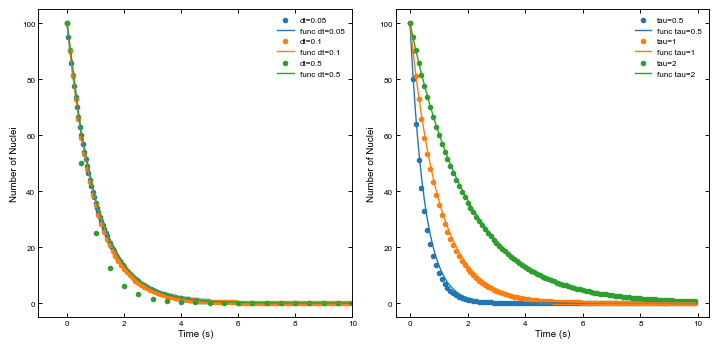

In [7]:
fig,ax = plt.subplots(1,2,figsize=(3.60236*2,3.5),dpi=100)
cmap = plt.get_cmap("tab10")

for i in range(3):
    ax[0].scatter(ls_dt[i][1],ls_dt[i][0],marker='.',color=cmap(i),label=label_dt[i])
    ax[0].plot(ls_funcdt[i][1],ls_funcdt[i][0],marker='',color=cmap(i),label='func '+label_dt[i])
    ax[1].scatter(ls_tau[i][1],ls_tau[i][0],marker='.',color=cmap(i),label=label_tau[i])
    ax[1].plot(ls_functau[i][1],ls_functau[i][0],marker='',color=cmap(i),label='func '+label_tau[i])

for i in range(2):
    ax[i].set_xlabel('Time (s)')
    ax[i].set_ylabel('Number of Nuclei')
    ax[i].legend(frameon=False)
ax[0].set_xlim(-1,10)

## Exercises

###  1.1 Freely falling

- $\frac{dv}{dt} = -g$
- $v = v_0 - gt$


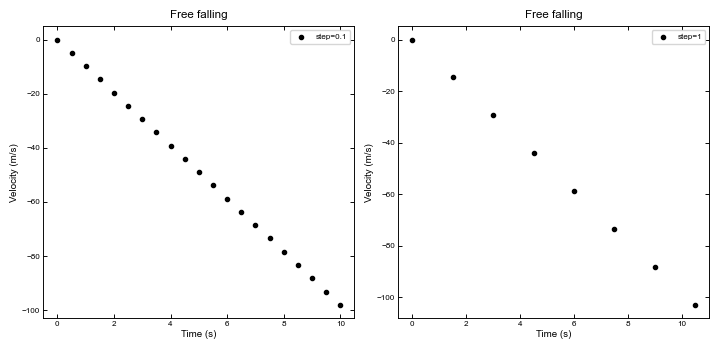

In [8]:
step = 0.01

def free_falling(step=0.01):
    t = np.arange(0, 10+step, step)
    n_step = len(t)
    v = np.zeros(n_step)
    g = 9.8
    for i in range(n_step):
        v[i] = -g*t[i]
    return t, v

fig,ax = plt.subplots(1,2,figsize=(3.60236*2,3.5),dpi=100)

t,v = free_falling(step=0.5)
ax[0].scatter(t,v,marker='.',color='k',label="step=0.1")
t,v = free_falling(step=1.5)
ax[1].scatter(t,v,marker='.',color='k',label="step=1")

for i in range(2):
    ax[i].set_xlabel("Time (s)")
    ax[i].set_ylabel("Velocity (m/s)")
    ax[i].set_title("Free falling")
    ax[i].legend()

### 1.2  object moving horizontally

$x = v t$

### 1.3 parachutist

$\frac{dv}{dt} = a - bv$

$v = v_{0} + (a-bv_{0})\Delta t$

- step要极小才有意义，不然会出现很大的误差

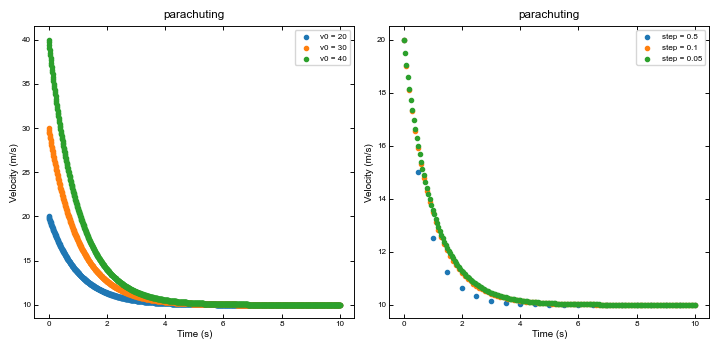

In [10]:
step = 0.01

def parachuting(step=0.01, a = 10, b =1,v0=20):
    t = np.arange(0, 10+step, step)
    n_step = len(t)
    v = np.zeros(n_step)
    v[0]=v0
    for i in range(n_step-1):
        v[i+1] = v[i] + a*step - b*v[i]*step
    return t, v

fig,ax = plt.subplots(1,2,figsize=(3.60236*2,3.5),dpi=100)
cmap = plt.get_cmap("tab10")

ls_v0 = [20,30,40]
for i in range(len(ls_v0)):
    t,v = parachuting(v0=ls_v0[i])
    ax[0].scatter(t,v,marker='.',color=cmap(i),label="v0 = "+str(ls_v0[i]))

ls_step = [0.5,0.1,0.05]
for i in range(len(ls_step)):
    t,v = parachuting(step=ls_step[i])
    ax[1].scatter(t,v,marker='.',color=cmap(i),label="step = "+str(ls_step[i]))

for i in range(2):
    ax[i].legend()
    ax[i].set_xlabel("Time (s)")
    ax[i].set_ylabel("Velocity (m/s)")
    ax[i].set_title("parachuting")


### 1.4 two types of nuclei radioactive decay 


In [11]:
import numpy as np
import matplotlib.pyplot as plt
def radioactive_A(tau_a = 1, tau_b=1,N_a0 = 100,step = 0.01):
    t = np.arange(0,10+step,step)
    n = len(t)
    N_a = np.zeros(n)
    N_b = np.zeros(n)
    N_a[0] = N_a0
    N_b[0] = 0
    for i in range(n-1):
        N_a[i+1] = N_a[i] - N_a[i]*step/tau_a
        N_b[i+1] = N_b[i] + (N_a[i]/tau_a - N_b[i]/tau_b)*step
    return t,N_a,N_b

In [12]:
def plot_radioactive(func):
    fig,ax = plt.subplots(5,5,figsize=(3.60236*2,3.5*2),dpi=100)
    ax = ax.flatten()
    ls_taua = [4,1,0.25,0.05,0.01]
    ls_taub = ls_taua[::-1]

    for i in range(len(ls_taua)**2):
        a = ls_taua[i//5]
        b = ls_taub[i%5]
        t,N_a,N_b = func(tau_a = a, tau_b = b,N_a0 = 100,step = 0.01)
        ax[i].scatter(t,N_a,s=1,marker='.',label = r'$\tau_a$ = {}'.format(a))
        ax[i].scatter(t,N_b,s=1,marker='.',label = r'$\tau_b$ = {}'.format(b))
                      
        ax[i].legend(frameon=False,fontsize=7)
        ratio = np.array(a/b)
        ax[i].set_title(f'$\tau_a/\tau_b$ = {ratio}')
    return fig,ax

Text(0.5, 0.98, "Radioactive Decay - Euler's Method")

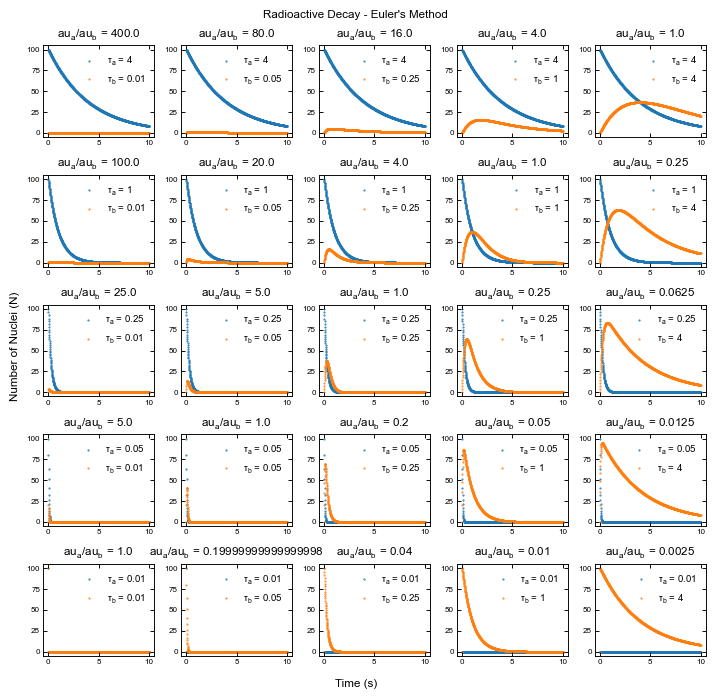

In [13]:
fig,ax = plot_radioactive(radioactive_A)

fig.supxlabel("Time (s)")
fig.supylabel("Number of Nuclei (N)")
fig.suptitle("Radioactive Decay - Euler's Method")

In [14]:
# analytic solution

def analytic(N_a0 = 100,tau_a = 1,tau_b = 0.1,step=0.01):
    t = np.arange(0, 10+step, step)
    N_a = np.vectorize(lambda t: N_a0*np.exp(-t/tau_a))(t)
    if tau_b == tau_a:
        k = (N_a0*tau_b/1e-10)
    else:
        k = (N_a0*tau_b/(tau_a-tau_b))
    N_b = np.vectorize(lambda t: k*(np.exp(-t/tau_a)-np.exp(-t/tau_b)))(t)
    return t,N_a,N_b

Text(0.5, 0.98, 'Radioactive Decay - Analytic Aolution')

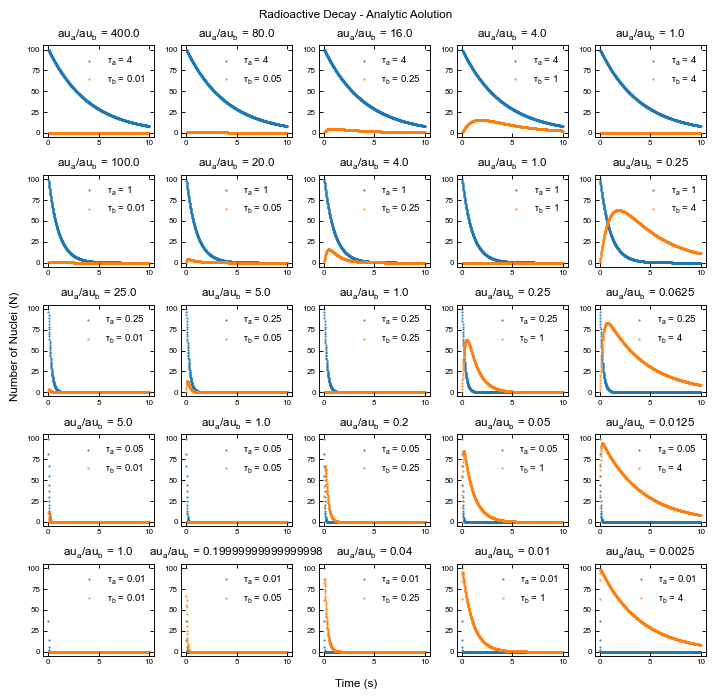

In [15]:
fig,ax = plot_radioactive(analytic)

fig.supxlabel("Time (s)")
fig.supylabel("Number of Nuclei (N)")
fig.suptitle("Radioactive Decay - Analytic Aolution")

- 为什么欧拉解不用考虑$\tau_a = \tau_b$?
- 对角线上$\tau_a = \tau_b$，观察规律
- 微分方程的求解过程一定要注意常数项

### 1.5 two states system




Text(0.5, 1.0, 'Two-State System')

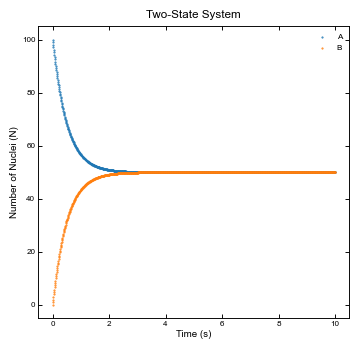

In [16]:
import numpy as np
import matplotlib.pyplot as plt
def two_state_sys_euler(tau = 1, N_a0 = 100,N_b0 = 0 , step = 0.01):
    t = np.arange(0,10+step,step)
    n = len(t)
    N_a = np.zeros(n)
    N_b = np.zeros(n)
    N_a[0] = N_a0
    N_b[0] = N_b0
    for i in range(n-1):
        N_a[i+1] = N_a[i] + (N_b[i]/tau - N_a[i]/tau)*step
        N_b[i+1] = N_b[i] + (N_a[i]/tau - N_b[i]/tau)*step
    return t,N_a,N_b

fig,ax = plt.subplots(figsize=(3.60236,3.5),dpi=100)

t,N_a,N_b = two_state_sys_euler(tau = 1, N_a0 = 100,N_b0 = 0 , step = 0.01)
ax.scatter(t,N_a,s=1,marker='.',label = r'A')
ax.scatter(t,N_b,s=1,marker='.',label = r'B')

ax.legend(frameon=False)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Number of Nuclei (N)")
ax.set_title("Two-State System")

Text(0.5, 1.0, 'Two-State System')

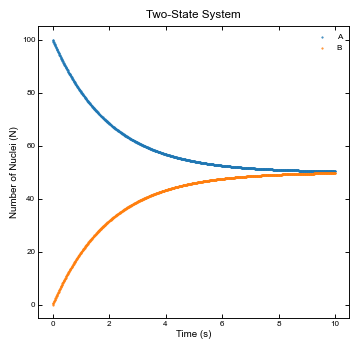

In [17]:
def two_state_sys_analytic(tau = 1, N_a0 = 100,N_b0 = 0 , step = 0.01):
    t = np.arange(0, 10+step, step)
    N_a = np.vectorize(lambda t: N_a0/2 * (1 + np.exp(-2*t/tau)))(t)
    N_b = np.vectorize(lambda t: N_a0/2 * (1 - np.exp(-2*t/tau)))(t)
    return t,N_a,N_b

ig,ax = plt.subplots(figsize=(3.60236,3.5),dpi=100)

t,N_a,N_b = two_state_sys_analytic(tau = 4 , N_a0 = 100,N_b0 = 0 , step = 0.01)
ax.scatter(t,N_a,s=1,marker='.',label = r'A')
ax.scatter(t,N_b,s=1,marker='.',label = r'B')

ax.legend(frameon=False)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Number of Nuclei (N)")
ax.set_title("Two-State System")

### 1.6 Population Growth

Text(0.5, 1.0, 'Population Growth')

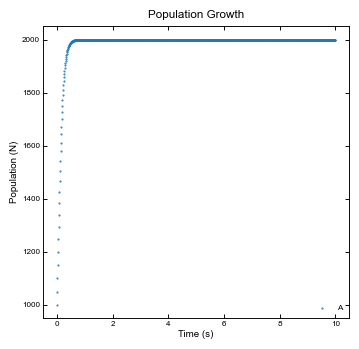

In [18]:
import numpy as np
import matplotlib.pyplot as plt
def pg_euler(a=10,b=3, N0 = 1000, step = 0.01):
    t = np.arange(0,10+step,step)
    n = len(t)
    N = np.zeros(n)
    N[0] = N0
    for i in range(n-1):
        N[i+1] = N[i] + (a*N[i] - b*N[i]**2)*step
    return t,N

fig,ax = plt.subplots(figsize=(3.60236,3.5),dpi=100)

t,N = pg_euler(a=10, b=0.005, N0 = 1000, step = 0.01)
ax.scatter(t,N,s=1,marker='.',label = r'A')

ax.legend(frameon=False)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Population (N)")
ax.set_title("Population Growth")

Text(0.5, 1.0, 'Population Growth')

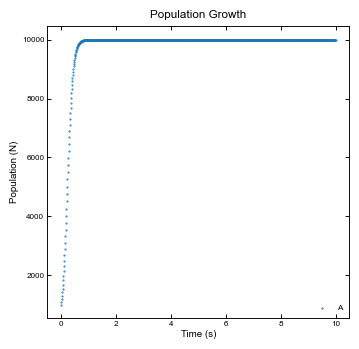

In [19]:
def pg_analytic(a=10,b=3, N0 = 1000, step = 0.01):
    time = np.arange(0, 10+step, step)
    k = 1-a/(b*N0)
    N = np.vectorize(lambda t: (a/b)/(1 - k*np.exp(-a*t)))(time)
    return time,N

fig,ax = plt.subplots(figsize=(3.60236, 3.5), dpi=100)

t,N = pg_analytic(a=10, b=0.001, N0 = 1000, step = 0.01)
ax.scatter(t, N, s=1, marker='.', label = 'A')

ax.legend(frameon=False)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Population (N)")
ax.set_title("Population Growth")

### Logistic Equation with a Threshold Population

Text(0.5, 1.0, 'Population Growth')

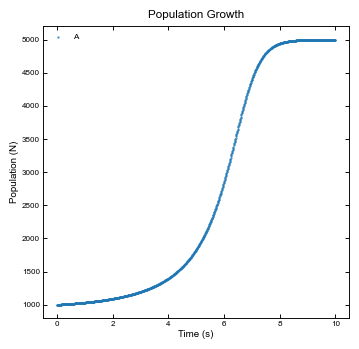

In [20]:
import numpy as np
import matplotlib.pyplot as plt
# https://math.libretexts.org/Bookshelves/Calculus/Calculus_(OpenStax)/08%3A_Introduction_to_Differential_Equations/8.04%3A_The_Logistic_Equation
def pg_euler(r=10, k=3, T=5000, N0 = 1000, step = 0.01):
    t = np.arange(0,10+step,step)
    n = len(t)
    N = np.zeros(n)
    N[0] = N0
    for i in range(n-1):
        N[i+1] = N[i] + (r*N[i])* (1- N[i]/k)*(N[i]/T-1)*step
    return t,N

fig,ax = plt.subplots(figsize=(3.60236,3.5),dpi=100)

t,N = pg_euler(r=0.6, k=950, T=5000, N0 = 1000, step = 0.01) # T可以限制最大值
ax.scatter(t,N,s=1,marker='.',label = r'A')

ax.legend(frameon=False)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Population (N)")
ax.set_title("Population Growth")

## that is exactly what i want!!!